In [2]:
#!pip install -U gensim

#(version: 3.8.1)

## Learn how to build word2vec using Gensim library  

- Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora.

- Gensim is one of the popular scientific software packages widely used for building vector space models.

- Efficient multicore implementations of popular algorithms, such as online Latent Semantic Analysis (LSA/LSI/SVD), Latent Dirichlet Allocation (LDA), etc., also word2vec deep learning.

In [2]:
import warnings
warnings.filterwarnings('ignore')

#data processing
import pandas as pd
import re

#modelling
from gensim.models import Word2Vec
from gensim.models import Phrases
from gensim.models.phrases import Phraser

### Load the Data

Load the dataset. 
The dataset used in this section is available in the stud-ip as text.zip

In [5]:
data = pd.read_csv('text.csv',header=None)

In [6]:
data.head()

,0
0,room kind clean strong smell dogs. generally a...
1,stayed crown plaza april april . staff friendl...
2,booked hotel hotwire lowest price could find. ...
3,stayed husband sons way alaska cruise. loved h...
4,girlfriends stayed celebrate th birthdays. pla...


### Preprocess and prepare the dataset

Define a function for preprocessing the data:

In [7]:
def pre_process(text):
    
    #convert to lowercase
    text = str(text).lower()
    
    #remove all special characters and keep only alpha numeric characters and spaces
    text = re.sub(r'[^A-Za-z0-9\s.]',r'',text)
    
    #remove new lines
    text = re.sub(r'\n',r' ',text)
    
    
    return text

In [8]:
pre_process(data[0][50])

'agree fancy. everything needed. breakfast pool hot tub nice shuttle airport later checkout time. noise issue tough sleep through. awhile forget noisy door nearby noisy guests. complained management later email credit compd us amount requested would return.'

#### Preprocess the whole dataset:

In [9]:

data[0] = data[0].map(lambda x: pre_process(x))

In [10]:

data[0].head()

0    room kind clean strong smell dogs. generally a...
1    stayed crown plaza april april . staff friendl...
2    booked hotel hotwire lowest price could find. ...
3    stayed husband sons way alaska cruise. loved h...
4    girlfriends stayed celebrate th birthdays. pla...
Name: 0, dtype: object

Genism library requires input in the from of list of lists. i.e,

text = [ [word1, word2, word3], [word1, word2, word3] ]

We know that each row in our data contains a set of sentences.

So we split them by '.' and convert them into list i.e,



In [11]:

data[0][1].split('.')[:5]

['stayed crown plaza april april ',
 ' staff friendly attentive',
 ' elevators tiny ',
 ' food restaurant delicious priced little high side',
 ' course washington dc']

Now, We have the data in a list.

But we need to convert them into a list of lists. 

So, now again we split them by space ' '. i.e, First we split the data by '.' and then we split them by ' ' so that we can get our data in a list of lists:



In [12]:

corpus = []
for line in data[0][1].split('.'):
    words = [x for x in line.split()]
    corpus.append(words)

As you can see below, we have our inputs in the form of lists of lists:



In [13]:
corpus[:2]

[['stayed', 'crown', 'plaza', 'april', 'april'],
 ['staff', 'friendly', 'attentive']]

Convert the whole text in our dataset to a list of lists and build a corpus. 

Corpus is just the collection of vocabulary.



In [14]:
data = data[0].map(lambda x: x.split('.'))

corpus = []
for i in (range(len(data))):
    for line in data[i]:
        words = [x for x in line.split()]
        corpus.append(words)

corpus[:2]

[['room', 'kind', 'clean', 'strong', 'smell', 'dogs'],
 ['generally', 'average', 'ok', 'overnight', 'stay', 'youre', 'fussy']]

#### Imp Note here: Now the problem we have is our corpus contains only unigrams and it will not give us results when we give bigram as an input, for an example say 'san francisco'.

So we use gensim's Phrases functions which collect all the words which occur together and add an underscore between them. 

So now 'san francisco' becomes 'san_francisco'.

We set the min_count parameter to 25 which implies we ignore all the words and bigrams which appears lesser than this.

In [15]:

phrases = Phrases(sentences=corpus,min_count=25,threshold=50)
bigram = Phraser(phrases)

In [16]:

for index,sentence in enumerate(corpus):
    corpus[index] = bigram[sentence]

As you can see below underscore has been added to the bigrams in our corpus:



In [17]:
corpus[111]

['connected', 'rivercenter', 'mall', 'downtown', 'san_antonio']

In [18]:
corpus[9]

['course', 'washington_dc']

## Build the Model

Now let us build the model. Let us define some of the important hyperparameters that the model needs.

Size represents the size of the vector i.e dimensions of the vector to represent a word.

The size can be chosen according to our data size. 

If our data is very small then we can set our size to a small value, but if we have significantly large dataset then we can set our vector size to 300. 

In our case, we set our size to 100

**Window size** represents the distance that should be considered between the target word and its neighboring word. 

Words exceeding the window size from the target word will not be considered for learning. 

Typically, a small window size is preferred.

**Min count** represents the minimum frequency of words. i.e if the particular word's occurrence is less than a min_count then we can simply ignore that word.

**workers** specify the number of worker threads we need to train the model

**sg=1** implies we use **skip-gram** method for training 

if **sg=0** then it implies we use **CBOW** for training

In [19]:

size = 100
window_size = 2
epochs = 100
min_count = 2
workers = 4
sg = 1

#### Train the model:

In [20]:
model = Word2Vec(corpus,sg=1,window=window_size,size=size, min_count=min_count,workers=workers,iter=epochs)

To save and load the model, we can simply use save and load functions respectivley.

Save the model:

In [22]:
model.save('word2vec.model')

Load the saved word2vec model:

In [3]:
model = Word2Vec.load('word2vec.model')

### Evaluate the Embeddings

After training the model, we evaluate them. Let us see what the model has been learned and **how well it has understood the semantics of words.** 

Genism provides a **most_similar** function which gives us top similar words related to the given word.

As you can see below, given san_deigo as an input we are getting all other related city names as most similar words:

In [41]:
model.most_similar('san_diego')

[('san_antonio', 0.7936885356903076),
 ('memphis', 0.7627897262573242),
 ('san_francisco', 0.7551584243774414),
 ('indianapolis', 0.7499819397926331),
 ('seattle', 0.7481856346130371),
 ('austin', 0.7402836084365845),
 ('phoenix', 0.7345595359802246),
 ('dallas', 0.7337039709091187),
 ('boston', 0.7174291610717773),
 ('dc', 0.7145372033119202)]

In [ ]:
We can also apply arithmetic operations on our vector to check how accurate our vectors are, 

For instance, woman + king - man = queen:

In [42]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)


[('queen', 0.7129390835762024)]

We can also find the words that do not match in the given set of words, 

for instance in the below list called text except the word **holiday** all others are city names and since our word2vec has understood the semantics of each word it returns the word **holiday** as the one that does not match with the other words in the list.

In [43]:

text = ['los_angeles','indianapolis', 'holiday', 'san_antonio','new_york']

model.doesnt_match(text)

'holiday'

In [44]:
model.wv['trump']

array([ 0.42193502, -0.10251976, -0.720918  ,  0.6105536 ,  0.36493096,
       -0.07195052, -0.44826135,  1.3847975 ,  0.8001965 ,  0.71533185,
       -0.36454782, -0.3125538 ,  0.24815202, -0.8110588 , -0.07720787,
        0.04969982,  0.1783642 , -0.08668404,  0.26465738,  0.3912528 ,
        0.17987198,  0.26718253, -0.48053983, -0.4797327 ,  0.6543521 ,
       -0.21470922, -0.68643093,  0.55414003,  0.39196506, -0.28634855,
        0.2353347 ,  0.13259031, -0.26475456,  0.23415758,  0.25091097,
       -0.07049581, -0.11230239,  0.5182959 ,  0.71435666, -0.32389894,
       -0.03413339,  0.06624817, -0.36405706,  0.46384203, -0.24500957,
        0.06160019, -0.08657636, -0.3759056 ,  0.16949706,  0.38994578,
       -0.4233215 ,  0.1287215 , -0.47454262, -0.98818046, -0.6111996 ,
       -0.08845171,  0.00723953,  0.48585814, -0.3431493 , -0.243574  ,
       -0.02992592, -0.43366838, -0.0057361 , -0.35540518,  0.1787694 ,
       -0.88571674,  0.16730392,  0.09647977,  0.16028388,  0.15

In [59]:
print(model['computer']) 

[-0.7426806  -0.5203897  -0.6441509   0.40882307 -0.18307236 -0.37786403
 -0.72099924 -0.01616677 -0.06405526 -0.7296605  -0.31601062 -0.43378994
  0.21064402  0.0899148   0.26102716  0.13957216  0.02967685 -0.5878121
 -0.02897648  0.34341428  0.07325852  0.13932614 -0.23032288  0.25419417
 -0.4080993   0.3969561  -0.5471775  -0.04228779  0.0018329  -0.5614577
  0.17858143  0.3934703  -0.57301027  0.0105887  -0.04403292 -0.19895205
  0.57538706 -0.2159755   0.02700089  0.62196076  0.03218001  0.24420056
  0.15480316 -0.299181   -0.53105706  0.36988187 -0.6848749   0.9290258
  0.7539003   0.6986771   0.1440303   0.27483815 -0.44512242 -0.18586266
  0.25002274 -0.45311582 -0.64454323 -0.1145201   0.21763796 -0.2727999
  0.2655212  -0.0868706  -0.42624128 -0.15778267 -0.33070797 -0.10800593
  0.11343816  0.45160013  0.6853991   0.69043833  0.12462872  0.26633132
 -0.10661864 -1.3999888   0.57867616 -0.38800424  0.32449552 -0.09559426
  0.21833803  0.3954816   0.20371053  0.46807915  0.657

#### Display a spatial map (i.e., scatterplot) with similar words from Word2Vec. 



In [6]:
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

TSNE: t-distributed Stochastic Neighbor Embedding.

t-SNE is a tool to visualize high-dimensional data.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.

In [3]:
def closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.005, x_coords.max()+0.005)
    plt.ylim(y_coords.min()+0.005, y_coords.max()+0.005)
    plt.show()

In [4]:
closestwords_tsnescatterplot(model, 'tasty')

NameError: name 'model' is not defined

<IPython.core.display.Javascript object>


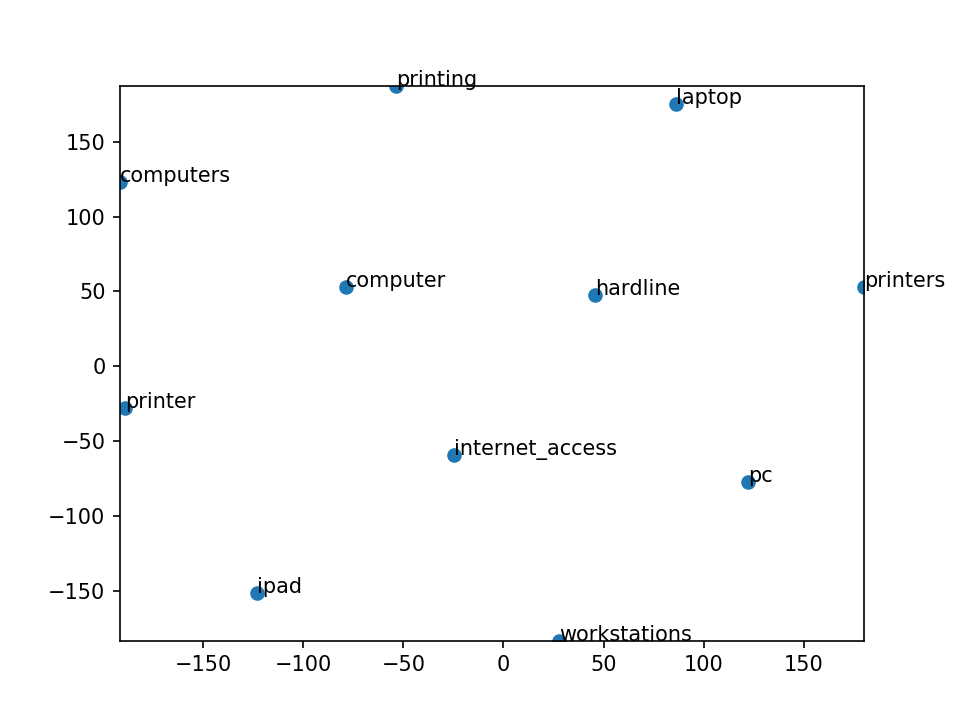

In [12]:
closestwords_tsnescatterplot(model, 'computer')